In [1]:
using SparseArrays, LinearAlgebra, IndexedGraphs
#using Pkg
#Pkg.activ§ate("../")
using Causality

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **



# Generation of Epidemics

In [2]:
T, N = 20.0, 300
#G = Causality.makeBarabasi(N,k=2)
#ρ = 3/N
#G = Causality.makeGNP(N,ρ)
G = Causality.makeProximity(N,2.1/N)

{300, 1752} directed sparse Int64 graph
⠤⠇⠄⠁⠀⢆⡀⠀⢂⢀⠀⠠⠨⢄⠅⠅⠀⠄⠐⠁⠀⠀⡇⡀⠀⠆⠠⠁⠀⠀⠒⣲⡀⠀⢁⠰⠰⡆⠒⡁
⠄⠁⡠⠊⠀⢀⠄⠜⢄⠠⠈⠈⡁⡀⡂⠴⠀⣁⠠⢌⠀⢃⡈⠈⡊⢃⠉⠆⠤⠂⢈⡈⣁⠠⣄⡹⠌⠉⠁⠀
⠠⢄⠀⢀⢎⠑⠚⡘⡀⠉⠈⡀⢈⢑⢐⠠⠦⢉⡪⢁⡪⠼⣀⢈⠀⠜⠀⡈⢐⠠⡈⡆⢀⣸⠀⠀⠁⡊⢬⠸
⠀⠈⣀⠅⣚⠠⠠⠂⢕⠘⢆⠄⠩⠀⡀⠀⡆⠂⡏⠂⠕⣐⢦⠁⡐⡀⠀⠔⠙⡄⠒⠁⠀⢈⠄⢀⢄⠒⠢⢲
⠈⢐⠀⡑⡄⠈⣑⠑⣀⠜⡃⠡⡣⠀⠊⠀⠅⠠⢌⠀⠁⠠⡉⠠⠁⢀⠔⠠⠀⠁⣒⠂⡒⢯⠀⠈⢔⠒⠠⠀
⠀⡀⡂⠀⠂⠠⠈⠕⠍⡈⢤⡳⡢⠠⠮⡕⠒⠀⠐⢵⢱⠂⠽⠨⣤⡀⢑⠊⠐⠬⠛⡀⣤⠔⡎⢔⢒⡨⠠⠄
⠂⢆⠁⠨⢆⢐⠃⠂⠉⠊⠈⡊⠀⢄⢊⠎⠩⠤⠊⠈⡀⠐⡀⡰⢰⢀⢦⡐⣉⣁⠀⡀⡕⠈⠨⡉⡉⡡⠐⠂
⠅⠅⢈⡌⠐⡐⠀⠈⠊⠀⢎⠧⡪⠔⠄⠅⣀⠀⢀⢎⣂⠃⠃⠰⠓⠄⠢⠐⣰⢲⠀⠂⠨⠀⢐⠒⡠⠶⡀⠅
⠀⠄⠄⢠⡌⢃⠨⠉⠁⡁⠘⠀⠃⡆⠀⠘⠊⡠⠉⢄⠲⠨⠀⢬⣰⢀⡄⠢⠀⠐⡒⠃⢄⠘⠢⠀⢁⠀⠚⠈
⠔⠀⡀⢆⠎⢊⠫⠉⠂⠑⢔⣄⡊⠀⡠⢔⠃⢄⠀⠀⠁⡘⠀⠠⣠⢀⠄⡤⣌⠠⢀⢁⠀⠵⡤⢈⠀⠡⣀⠘
⠀⠀⠤⢀⣊⡎⢑⢡⠁⡀⠱⠒⢀⠈⠬⠘⡘⡂⣁⠠⢴⠓⠋⠀⠔⠄⡀⠺⠸⠩⠐⠁⡀⣀⠃⠀⠁⠩⠇⢀
⠉⠩⡂⠈⡀⢘⠌⠓⠃⡈⡓⡃⢀⡨⢉⡀⡀⣄⠀⡀⠋⠀⢚⠐⢀⠁⡄⢢⠀⢀⠂⠈⢑⡒⢠⠀⠐⢑⢀⡂
⠠⠄⠮⢈⣀⠄⠐⠨⠁⢀⠀⠻⠐⢒⠙⠄⠐⢚⠀⢚⠐⠅⠄⠐⠎⠁⠣⠂⠀⡒⢀⢠⠂⠂⡃⡠⢀⠄⠐⠀
⠄⠂⠣⠄⡀⠠⢀⠄⠐⡁⡱⠐⢈⠳⢈⠂⠠⡉⠀⡥⣠⡈⠠⣉⠩⠂⡁⠈⢆⢀⠶⠀⠂⠳⢌⠂⠖⠪⣠⡀
⠀⠀⠠⠃⠐⡐⠓⠤⠄⠀⡐⡄⠇⢸⢰⣚⢀⠀⠂⡙⡖⡂⠀⢀⢠⠠⠈⢑⠀⡠⡀⠂⣅⡅⢌⠥⢅⢢⡊⡀
⢸⣠⡂⠰⠢⠬⠜⠀⠸⠘⠛⠠⠀⠠⠠⠀⠼⠈⠄⢐⠔⠀⡈⠀⠀⣐⠘⠃⠠⠈⢊⡰⠠⠛⡂⡒⠨⡜⠢⠀
⠀⠈⠁⡘⣀⣰⡀⢀⡼⣌⢀⠟⡑⠉⠂⠂⣀⠑⢄⡄⠀⢨⢱⠰⠨⠀⢬⡀⠅⠽⣤⠂⠄⡡⠈⠁⠉⠑⠀⢃
⢁⡐⣄⡹⠀⠀⠀⢁⡀⠀⢊⢍⡆⠢⢰⠐⠈⠂⡀⢋⠉⠀⠀⠒⠉⡨⠢⠑⠆⡕⢨⠨⠆⠀⠄⠁⢇⠐⡈⢅
⠰⠦⡆⠁⡡⠠⢠⠑⢰⠑⡘⡰⠇⡨⢠⡎⠁⠐⠄⡀⡅⡀⢔⢀⠀⠔⡸⡁⠡⣑⣂⠦⢇⠀⢉⠑⠠⠂⠒⠀
⠜⠠⠁⠀⣂⡓⢨⣂⠀⠂⠀⠆⠰⠀⠄⠌⡚⠀⣀⠘⠉⢁⠠⠰⠐⠀⠀⠺⠊⠨⠈⠂⠤⢀⠆⢌⠘⠀⡀⠈

In [3]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 1 method)

In [4]:
#Initialize generation parameters
ε = 1e-10
λ = 0.2
pseed = 1/N
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
inf_out = GaussianRate(λ, T/2, 1/ε)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [40]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

inf_min = GaussianRate(ε  ,  -T,   ε)
inf_max = GaussianRate(1/ε  ,  2T, 1. )

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [34]:
const Igen = GenerativeSI{GaussianRate,GaussianRate} 
const Igauss = GaussianInferentialSI

GaussianInferentialSI

In [35]:
V = fill(MaskedRate(UnitRate(),Causality.intervalUnion(0,T)), ne(G));
Mp = StochasticModel(Igen, T, θp, G, θpgen, V);
sample! = Sampler(Mp);
xtrue = zeros(N)
ni = 0
while !(0.45 < ni < 0.55)
    sample!(xtrue)
    ni = sum(xtrue .< T)/N
end
ni

0.5366666666666666

In [36]:
nobs, p = 100, 1e-5 #p is mute
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]
f_rate = 1e-5
O=[rand()< f_rate ? (o[1],!o[2],o[3],f_rate) : (o[1],o[2],o[3],f_rate) for o in O]

100-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 11.358778319604852, 1.0e-5)
 (2, 1, 19.079537486139113, 1.0e-5)
 (3, 0, 10.326879437391456, 1.0e-5)
 (4, 1, 14.591139850481976, 1.0e-5)
 (5, 0, 18.41437813175135, 1.0e-5)
 (6, 0, 13.814646465936793, 1.0e-5)
 (7, 0, 19.806257416058216, 1.0e-5)
 (8, 0, 16.020977650200482, 1.0e-5)
 (9, 0, 15.89096713975062, 1.0e-5)
 (10, 0, 18.593106807023975, 1.0e-5)
 (11, 1, 15.173841981063958, 1.0e-5)
 (12, 0, 12.594231459620826, 1.0e-5)
 (13, 0, 16.910735278217675, 1.0e-5)
 ⋮
 (89, 1, 11.700926101540311, 1.0e-5)
 (90, 1, 19.667209767475118, 1.0e-5)
 (91, 0, 14.844725197387305, 1.0e-5)
 (92, 0, 18.706495221738386, 1.0e-5)
 (93, 1, 17.28766450673233, 1.0e-5)
 (94, 0, 13.773597507730265, 1.0e-5)
 (95, 1, 18.572393556514463, 1.0e-5)
 (96, 0, 17.98380626501986, 1.0e-5)
 (97, 1, 12.285000199050419, 1.0e-5)
 (98, 0, 12.780810152436308, 1.0e-5)
 (99, 1, 14.193415620305164, 1.0e-5)
 (100, 1, 19.70783906979277, 1.0e-5)

## Causality 

In [41]:
#Softened model
T = Float64(T)
ε = 2e-6
autoinf = GaussianRate(ε, T/2, T);
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen, V);

In [42]:
θ = getpar(pseed, autoinf, inf_in);
autoinf = GaussianRate(1/(N*T), T/2, T);
M = StochasticModel(Igauss, T, θ, G, θp2gen, V);

In [43]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.));
F = descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03),
         hyperdescender=SignDescender(0.));

Progress: 100%|█████████████████████████████████████████| Time: 0:01:17
  F:  82.5492409610415


In [44]:
statscau = prior(M, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


## SoftMarg

In [45]:
Osoft = [(o[1],o[2],o[3],max(0.05,f_rate)) for o in O]

100-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 11.358778319604852, 0.05)
 (2, 1, 19.079537486139113, 0.05)
 (3, 0, 10.326879437391456, 0.05)
 (4, 1, 14.591139850481976, 0.05)
 (5, 0, 18.41437813175135, 0.05)
 (6, 0, 13.814646465936793, 0.05)
 (7, 0, 19.806257416058216, 0.05)
 (8, 0, 16.020977650200482, 0.05)
 (9, 0, 15.89096713975062, 0.05)
 (10, 0, 18.593106807023975, 0.05)
 (11, 1, 15.173841981063958, 0.05)
 (12, 0, 12.594231459620826, 0.05)
 (13, 0, 16.910735278217675, 0.05)
 ⋮
 (89, 1, 11.700926101540311, 0.05)
 (90, 1, 19.667209767475118, 0.05)
 (91, 0, 14.844725197387305, 0.05)
 (92, 0, 18.706495221738386, 0.05)
 (93, 1, 17.28766450673233, 0.05)
 (94, 0, 13.773597507730265, 0.05)
 (95, 1, 18.572393556514463, 0.05)
 (96, 0, 17.98380626501986, 0.05)
 (97, 1, 12.285000199050419, 0.05)
 (98, 0, 12.780810152436308, 0.05)
 (99, 1, 14.193415620305164, 0.05)
 (100, 1, 19.70783906979277, 0.05)

In [46]:
stats, weights = softpostnoise(Mp, Osoft; numsamples=2 * 10^5);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:01


## Sib

In [47]:
using PyCall
@pyimport sib
function sibyl(N, T_cont, Λ, O, γ, λ ; dt=1/5, maxit = 400, tol = 1e-14)
    
    T = Int(round(T_cont / dt))
    contacts = [(i-1,j-1,t, λ * dt) for t in 1:T for (i,j,v) in zip(findnz(Λ.A)...)];
    obs = [[(i,-1,t) for t=1:T for i=0:N-1];
           [(i-1,s,Int(round(t/dt))) for (i,s,t,p) in O]]
    sort!(obs, lt=((i1,s1,t1),(i2,s2,t2))->(t1<t2))
    prob_sus = 0.5
    prob_seed=γ
    pseed = prob_seed / (2 - prob_seed)
    psus = prob_sus * (1 - pseed)
    params = sib.Params(prob_r=sib.Exponential(mu=0), pseed=pseed, psus=psus,pautoinf=1e-10,fp_rate=1e-10,fn_rate=1e-10)
    f = sib.FactorGraph(contacts=contacts, observations=obs, params=params)
    sib.iterate(f, maxit=maxit,tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.5, tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.9, tol=tol)
    p_sib=[collect(n.bt) for n in f.nodes]
    m_sib = zeros(N, T)
    for i=1:N
        m_sib[i,1] = p_sib[i][1] 
        for t=2:T
            m_sib[i,t] = m_sib[i,t-1] + p_sib[i][t]
        end
    end 
    return m_sib
end


sibyl (generic function with 1 method)

In [48]:
a=time()
dt = 1/4
p_sib = sibyl(N, T, G, O, 1/N, λ; dt=dt, maxit = 40, tol = 1e-7);
b=time()
println(b-a)


sib.iterate(damp=0.0): 39/40 4.042e-01/1e-07      
sib.iterate(damp=0.5): 39/40 3.988e-02/1e-07      
67.303073883056640.9): 39/40 1.389e-01/1e-07      


# Heuristic

In [49]:
using IntervalUnionArithmetic
T = Float64(T)
struct HeuristicSI <: SI end
θp2gen = getpargen(pseed, autoinf, inf_out);
maskauto = fill(intervalUnion(0., T),N)
maskinf = fill(intervalUnion(0., T),N)
θfrench = getpar(pseed, autoinf, inf_in);
Causality.individual(M::StochasticModel{HeuristicSI}, i::Int, θi = @view(M.θ[:,i]), θg = M.θgen ) = 
@views IndividualSI(θi[1], 
    MaskedRate(GaussianRate(θi[2:4]...),maskauto[i]), 
    MaskedRate(UnitRate(),maskinf[i]), 
    GaussianRate(θg[5:7]...),)
inf_start_time = T * ones(N)
for o in O
    if o[2] == 1
        inf_start_time[o[1]] = min(inf_start_time[o[1]], o[3] - 5)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3]-5, T)       
        θfrench[2,o[1]] = 10^10
        θfrench[3,o[1]] = o[3] - 5
        θfrench[4,o[1]] = 100 * T
    elseif o[2] == 0
        maskinf[o[1]] = maskinf[o[1]] ∩ intervalUnion(o[3], T)
        maskauto[o[1]] = maskauto[o[1]] ∩ intervalUnion(o[3], T)
        θfrench[1,o[1]] = 1e-10
    end
end
for i=1:N
    if inf_start_time[i] != T 
        maskauto[i] = maskauto[i] ∩ intervalUnion(inf_start_time[i], T)
    end
end
Mfrench = StochasticModel(HeuristicSI, T, θfrench, G, θp2gen);
statsfre = prior(Mfrench,numsamples=10000); 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


In [50]:
function MF_heu(N, T_cont, Λ, O, γ, λ ; dt=1/5, maxit = 400)
    T = Int(round(T_cont / dt))
    p_MF = zeros(N,T) #prob to be S
    p_MF[:,1] .= 1 - γ 
    obs_I = [o[1] for o in O if o[2] == 1]
    obs_S = [o[1] for o in O if o[2] == 0]
    for st = 1:maxit
        for t = 2:T
            for i = 1:N
                p_MF[i,t] = p_MF[i,t-1]
                for j in collect(Causality.outedges(Λ,1))
                    p_MF[i,t] *= 1 - λ*(1 - p_MF[j.dst,t-1])
                end
                if i in obs_I                    
                    o = O[i]
                    p_MF[i, Int(round((o[3]-5)/dt)) : end] .= 0
                end
                if i in obs_S
                    o = O[i]
                    p_MF[i, 1 : Int(round(o[3]/dt))] .= 1
                end
            end
        end
    end
    return 1 .- p_MF
end

MF_heu (generic function with 1 method)

In [51]:
p_MF = MF_heu(N, T, G, O, 1/N, λ ; dt=dt, maxit = 100)

300×80 Matrix{Float64}:
 0.0         0.0         0.0        …  1.0       1.0       1.0
 0.00333333  0.00665113  0.0132405     1.0       1.0       1.0
 0.0         0.0         0.0           1.0       1.0       1.0
 0.00333333  0.00665113  0.0132405     1.0       1.0       1.0
 0.0         0.0         0.0           0.99729   0.999431  0.999881
 0.0         0.0         0.0        …  1.0       1.0       1.0
 0.0         0.0         0.0           0.0       0.0       0.790252
 0.0         0.0         0.0           1.0       1.0       1.0
 0.0         0.0         0.0           1.0       1.0       1.0
 0.0         0.0         0.0           0.99729   0.999431  0.999881
 0.00333333  0.00665113  0.0132405  …  1.0       1.0       1.0
 0.0         0.0         0.0           1.0       1.0       1.0
 0.0         0.0         0.0           0.999997  0.999999  1.0
 ⋮                                  ⋱                      
 0.00333333  0.00665113  0.0132405     1.0       1.0       1.0
 0.00333333  0.0066

## Metropolis Monte Carlo

In [52]:
K = Causality.GaussMove(2.0)
#stats_mh = Causality.metropolis_sampling_parallel(Mp, O, K; numsamples = 10^3,numsteps=10^3)
stats_mh = Causality.metropolis_sampling_sequential(Mp, O, K; numsamples = 10^5,numsteps=150);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:39
  acc_ratio:  0.4866666666666667



## Marginals and ROC curve

In [53]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum(stats[:,i] .< t)/numsamp
end

function reweighted_marginal(i, t, stats, weights)
    numsamp = size(stats,1)
    @assert numsamp == size(weights,1)
    weights ./= maximum(weights)
    sum(weights .* (stats[:,i] .< t))/sum(weights)
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

In [54]:
#Marginals
bins = 2 * Int(T)
using Plots
p_cau = zeros(N,bins)
p_french = zeros(N,bins)
p_mh = zeros(N,bins)
p_soft = zeros(N,bins)
for i = 1:N
    for t = 1:bins
       p_cau[i,t] = marginal(i, t*T/bins, statscau)
       p_french[i,t] = marginal(i, t*T/bins, statsfre)
       p_mh[i,t] = marginal(i, t*T/bins, stats_mh)
       p_soft[i,t] = reweighted_marginal(i, t*T/bins, stats, weights)
    end
end

In [55]:
xtrue[13]

20.0

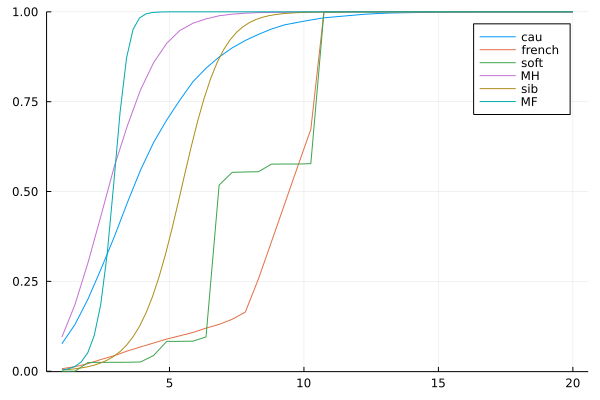

In [56]:
i = 11
plot(LinRange(1,Int(T),bins),p_cau[i,:], label = "cau")
plot!(LinRange(1,Int(T),bins),p_french[i,:], label = "french")
plot!(LinRange(1,Int(T),bins),p_soft[i,:], label = "soft")
plot!(LinRange(1,Int(T),bins),p_mh[i,:], label = "MH")
plot!(LinRange(1,Int(T),Int(round(T/dt))),p_sib[i,:], label = "sib")
plot!(LinRange(1,Int(T),Int(round(T/dt))),p_MF[i,:], label = "MF")
ylims!(-0.001,1)

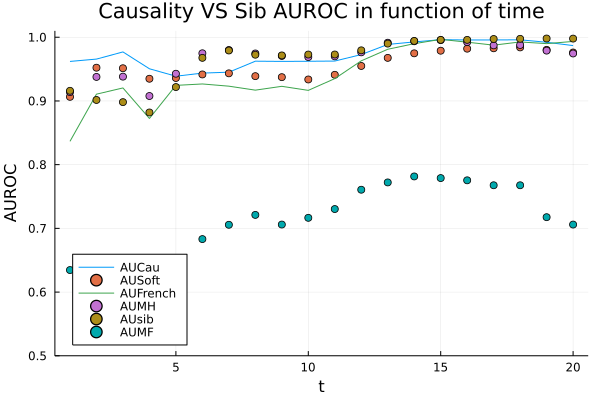

In [57]:
#AUROC curves

T = Int(T)
AU_curve=zeros(T)
AU_sib=zeros(T)
AU_MF=zeros(T)
AU_french = zeros(T)
AU_soft = zeros(T)
AU_MH = zeros(T)
for t = 1:T
    cau_risk=zeros(N)
    sib_risk = zeros(N)
    MF_risk = zeros(N)
    french_risk = zeros(N)
    MH_risk = zeros(N)
    soft_risk = zeros(N)
    for i=1:N
       cau_risk[i] = marginal(i,t,statscau)
       french_risk[i] = marginal(i,t,statsfre)
       MH_risk[i] = marginal(i,t,stats_mh)
       sib_risk[i] = p_sib[i,Int(round(t/dt))]
        MF_risk[i] = p_MF[i,Int(round(t/dt))]
       soft_risk[i] = reweighted_marginal(i, t*T/bins, stats, weights)
    end
    xt = xtrue .< t
    AU_soft[t] = AUROC(ROC(xt, soft_risk))
    AU_curve[t] = AUROC(ROC(xt, cau_risk))
    AU_french[t] = AUROC(ROC(xt, french_risk))
    AU_MH[t] = AUROC(ROC(xt, MH_risk))
    AU_sib[t] = AUROC(ROC(xt, sib_risk))
    AU_MF[t] = AUROC(ROC(xt, MF_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUCau", title="Causality VS Sib AUROC in function of time")
scatter!(LinRange(1,T,T),AU_soft, label="AUSoft",legend=:bottomleft)
plot!(LinRange(1,T,T),AU_french, label="AUFrench")
scatter!(LinRange(1,T,T),AU_MH, label="AUMH")
scatter!(LinRange(1,T,T), AU_sib, label="AUsib")
scatter!(LinRange(1,T,T), AU_MF, label="AUMF")
xlabel!("t")
ylabel!("AUROC")
savefig("confronti.pdf")
ylims!(0.5,1.01)

## Final state correlations
Causality can not reproduce negative correlations in its actual form. Let us see if they are important or not.
We will use MC or SoftMarg in order to study them. These methods are not exact, yet they should provide at least a qualitative scheme on the correlations.

In [ ]:
weights ./= maximum(weights)
norm = sum(weights)
xTsoft = (stats .< T ) .* 2 .- 1
corr = 0
for i = 1:N
    for j=1:i
        corr += sum(xTsoft[:,i] .* xTsoft[:,j] .* weights )/norm  - sum(xTsoft[:,i] .* weights )/norm * sum(xTsoft[:,j] .* weights ) /norm 
    end
end
corr
